In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../../pycore/')
from simulate import RBA_result
from utils import extract_details_from_rxnid

import matplotlib.pyplot as plt
import matplotlib.patches as mp
import matplotlib.lines as mlines
from matplotlib.transforms import ScaledTranslation
%matplotlib inline

In [2]:
df_kapp = pd.read_excel('../results/kapp_inPerSec.xlsx')
df_kapp.index = df_kapp.id.to_list()

casesC = pd.read_csv('../input/data_list_batch.txt', sep='\t')
casesC = casesC.data_id.to_list()
df_kapp = df_kapp.loc[:, casesC]

In [3]:
vivo_0 = pd.core.series.Series(dtype='float64')
for i in df_kapp.index:
    vals = [v for v in df_kapp.loc[i,:] if pd.isnull(v) == False]
    if vals != []:
        vivo_0[i] = np.max(vals)

In [4]:
df_kcat = pd.read_excel('../input/rxn_enz_kcat_kapp.xlsx')
idx = [df_kcat.rxn_id[i] + '_' + df_kcat.direction[i] for i in df_kcat.index]
df_kcat.index = idx
df = df_kcat[df_kcat['kcat_invitro (1/s)'].isnull() == False]
idx = df.index.to_list()

vitro_0 = pd.core.series.Series(dtype='float64')
for i in idx:
    vitro_0[df_kcat.rxn_id[i] + '_' + df_kcat.direction[i]] = df_kcat.loc[i, 'kcat_invitro (1/s)']

In [5]:
idx = sorted(list(set(vivo_0.index) & set(vitro_0.index)))
vivo = np.log10(vivo_0[idx])
vitro = np.log10(vitro_0[idx])

In [6]:
glys = ['HEX1_c_FWD', 'PGI_c_FWD', 'PFK_c_FWD', 'FBA_c_FWD', 'TPI_c_FWD',
        'GAPD_c_FWD', 'PGK_c_FWD', 'PGM_c_FWD', 'ENO_c_FWD', 'PYK_c_FWD']

glys_labels = [i[:-4] for i in glys]

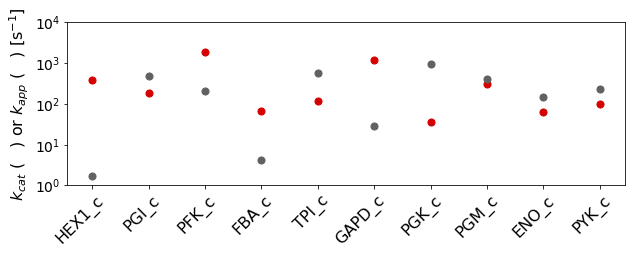

In [7]:
fig,ax = plt.subplots(figsize=(10,3))

N = len(glys)
for i in range(0,N):
    rxn = glys[i]
    ax.scatter(i, vivo[rxn], color='#d50000', s=50)
    ax.scatter(i, vitro[rxn], color='#616161', s=50)

yticks = [0,1,2,3,4]
yticklabels = ['10$^' + str(i) + '$' for i in yticks]
ax.set_ylim(0,4)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=14);
ax.set_ylabel('$k_{cat}$ (   ) or $k_{app}$ (   ) [s$^{-1}$]', fontsize=16)

xticks = range(0,N)
ax.set_xticks(xticks)
ax.set_xticklabels(glys_labels, fontsize=16);

offset = ScaledTranslation(0.2, 0, fig.dpi_scale_trans)
for label_obj in ax.get_xticklabels():
    label_obj.set_rotation(45)
    label_obj.set_transform(label_obj.get_transform() + offset)
    label_obj.set_horizontalalignment('right')
    
plt.savefig('./figures/glys_metabolon_frompy.png', transparent=True, bbox_inches='tight')

In [21]:
vitro['PGK_c_FWD']

2.5490032620257876

In [32]:
rxn = 'HEX1_c_FWD'
10**(vivo[rxn] - vitro[rxn])

736.7699868804071

In [33]:
rxn = 'FBA_c_FWD'
10**(vivo[rxn] - vitro[rxn])

84.34565602310889

In [34]:
import cobra
model = cobra.io.load_json_model('../../scRBA_build_GAMS_model/input/GSM_y834_hvd_v6_rba.json')

Using license file /home/hvdinh16/Workspace/Softwares/gurobi910/linux64/gurobi.lic
Academic license - for non-commercial use only - expires 2022-08-08


In [23]:
model.reactions.PGK_c

Reaction identifier,PGK_c
Name,phosphoglycerate kinase
Memory address,0x07fe8137277d0
Stoichiometry,"13dpg_c + adp_c <=> 3pg_c + atp_c 1,3-bisphospho-D-glycerate [cytoplasm] + ADP [cytoplasm] <=> 3-phosphonato-D-glycerate(3-) [cytoplasm] + ATP [cytoplasm]"
GPR,YCR012W
Lower bound,-1000.0
Upper bound,1000.0
